## Student Performance Indicator


#### Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

### 1) Problem statement
- This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.


### 2) Data Collection
- Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- The data consists of 8 column and 1000 rows.

### 2.1 Import Data and Required Packages
####  Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Import the CSV Data as Pandas DataFrame

In [5]:
df = pd.read_csv('stud.csv')

#### Show Top 5 Records

In [6]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Shape of the dataset

In [7]:
df.shape

(1000, 8)

### 2.2 Dataset information

- gender : sex of students  -> (Male/female)
- race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
- parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
- lunch : having lunch before test (standard or free/reduced) 
- test preparation course : complete or not complete before test
- math score
- reading score
- writing score

### 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

### 3.1 Check Missing values

In [8]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

#### There are no missing values in the data set

### 3.2 Check Duplicates

In [9]:
df.duplicated().sum()

0

#### There are no duplicates  values in the data set

### 3.3 Check data types

In [10]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### 3.4 Checking the number of unique values of each column

In [11]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

### 3.5 Check statistics of data set

In [12]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### Insight
- From above description of numerical data, all means are very close to each other - between 66 and 68.05;
- All standard deviations are also close - between 14.6 and 15.19;
- While there is a minimum score  0 for math, for writing minimum is much higher = 10 and for reading myet higher = 17

### 3.7 Exploring Data

In [13]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [14]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race_ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


In [15]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['math_score', 'reading_score', 'writing_score']

We have 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [16]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


### 3.8 Adding columns for "Total Score" and "Average"

In [17]:
df['total score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [18]:
reading_full = df[df['reading_score'] == 100]['average'].count()
writing_full = df[df['writing_score'] == 100]['average'].count()
math_full = df[df['math_score'] == 100]['average'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [19]:
reading_less_20 = df[df['reading_score'] <= 20]['average'].count()
writing_less_20 = df[df['writing_score'] <= 20]['average'].count()
math_less_20 = df[df['math_score'] <= 20]['average'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


#####  Insights
 - From above values we get students have performed the worst in Maths 
 - Best performance is in reading section

### 4. Exploring Data ( Visualization )
#### 4.1 Visualize average score distribution to make some conclusion. 
- Histogram
- Kernel Distribution Function (KDE)

#### 4.1.1 Histogram & KDE

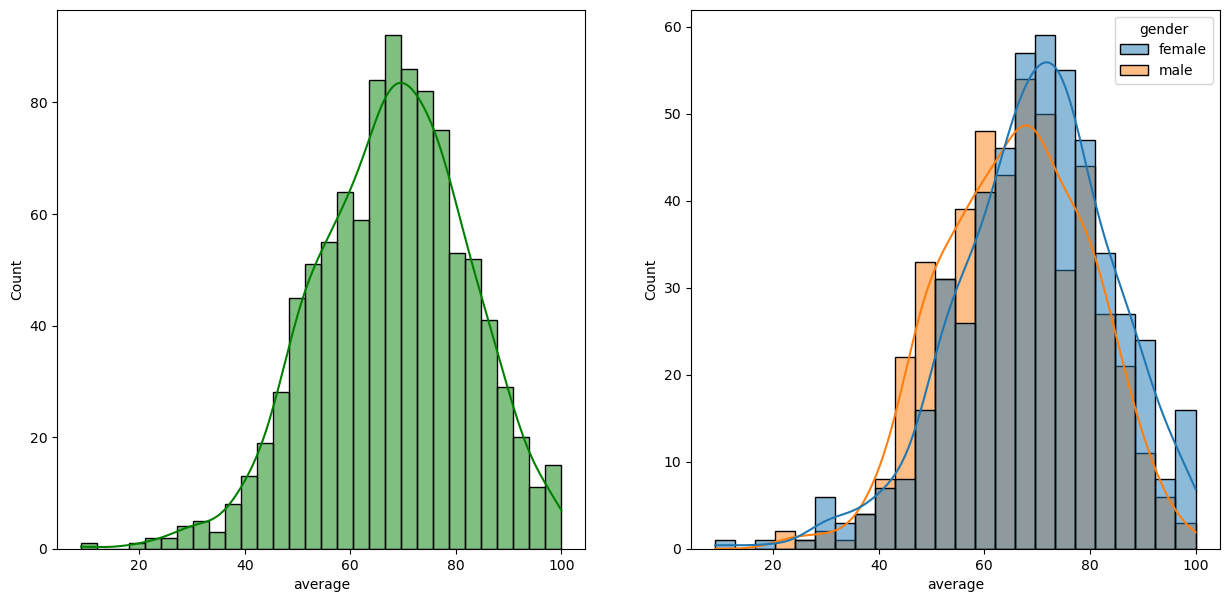

In [20]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()

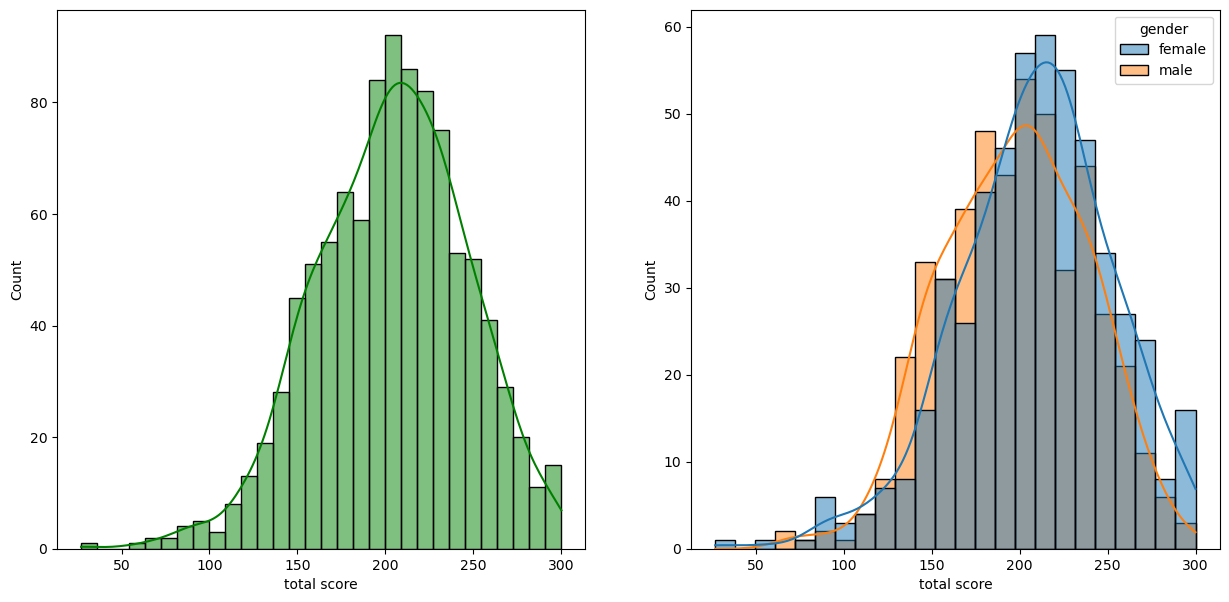

In [21]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='total score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total score',kde=True,hue='gender')
plt.show()

#####  Insights
- Female students tend to perform well then male students.

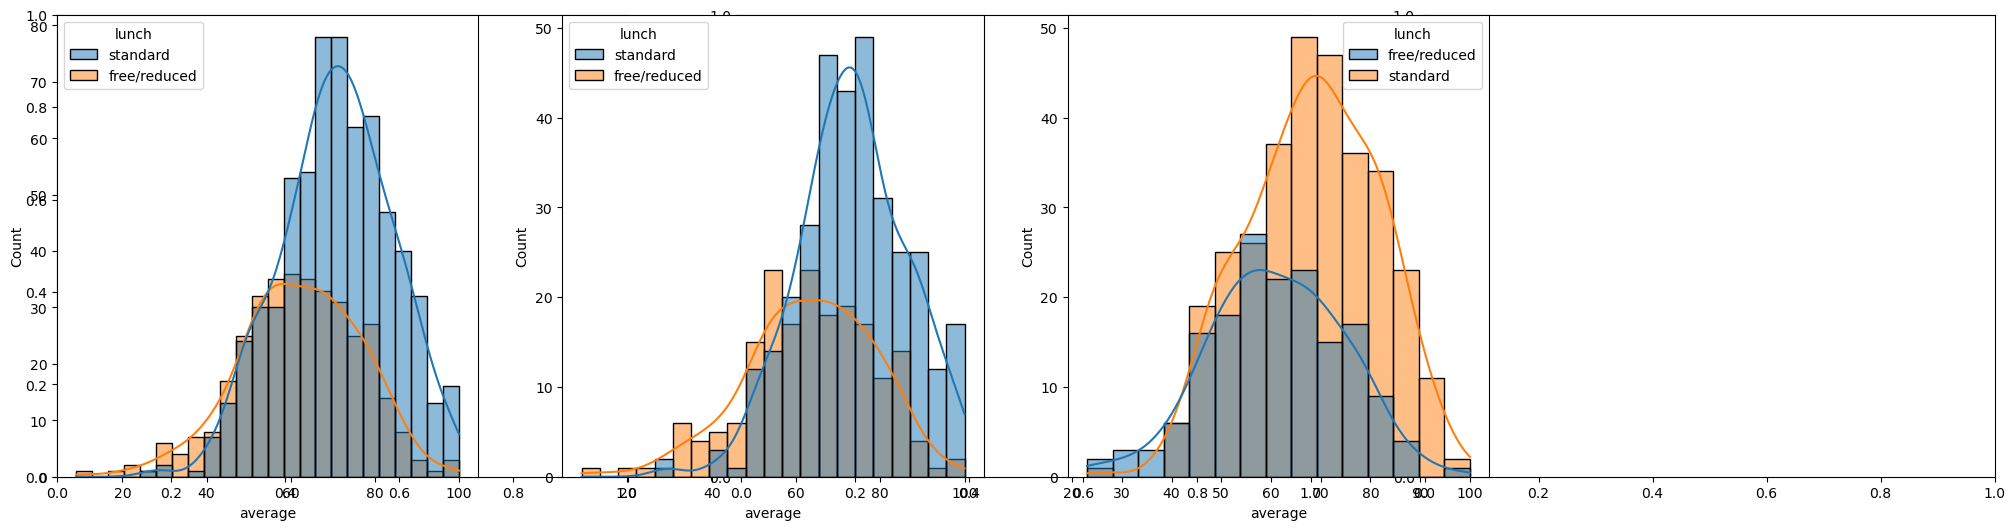

In [22]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
plt.show()

#####  Insights
- Standard lunch helps perform well in exams.
- Standard lunch helps perform well in exams be it a male or a female.

In [29]:
print(df.columns.tolist())


['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course', 'math_score', 'reading_score', 'writing_score', 'total score', 'average']


Detected hue column: parental_level_of_education


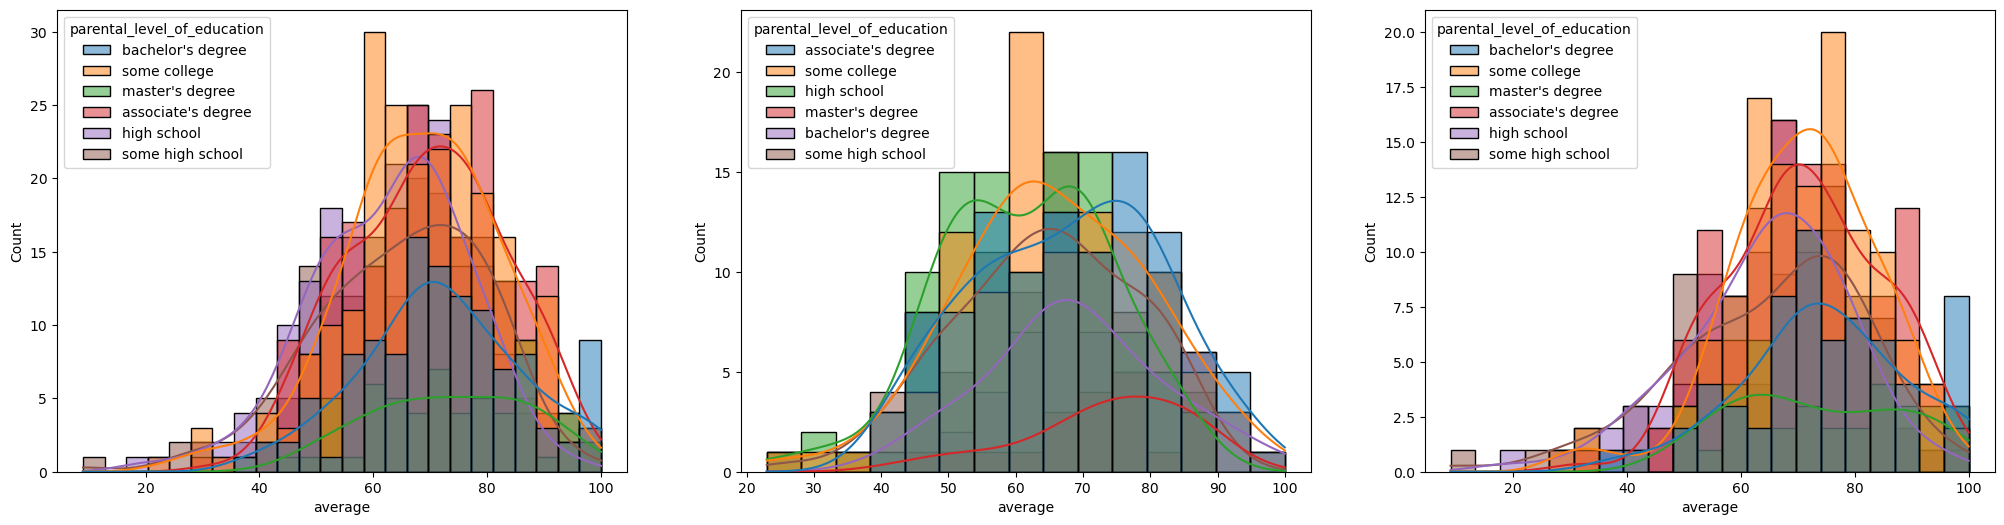

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# --------------------------------------------
# 1. Auto-detect the correct column name
# --------------------------------------------
target = "parental level of education"

# Find the column with the closest name
col = None
for c in df.columns:
    if c.strip().lower().replace("_", " ") == target.lower():
        col = c
        break

# If still not found, search for any column containing "parent"
if col is None:
    for c in df.columns:
        if "parent" in c.lower():
            col = c
            break

# Show the detected column
print("Detected hue column:", col)

# --------------------------------------------
# 2. Plotting
# --------------------------------------------
plt.figure(figsize=(25, 6))

# Plot 1
plt.subplot(131)
sns.histplot(
    data=df,
    x='average',
    kde=True,
    hue=col
)

# Plot 2 (Male)
plt.subplot(132)
sns.histplot(
    data=df[df.gender == 'male'],
    x='average',
    kde=True,
    hue=col
)

# Plot 3 (Female)
plt.subplot(133)
sns.histplot(
    data=df[df.gender == 'female'],
    x='average',
    kde=True,
    hue=col
)

plt.show()


#####  Insights
- In general parent's education don't help student perform well in exam.
- 2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
- 3rd plot we can see there is no effect of parent's education on female students.

In [25]:
print(df.columns)


Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'total score', 'average'],
      dtype='object')


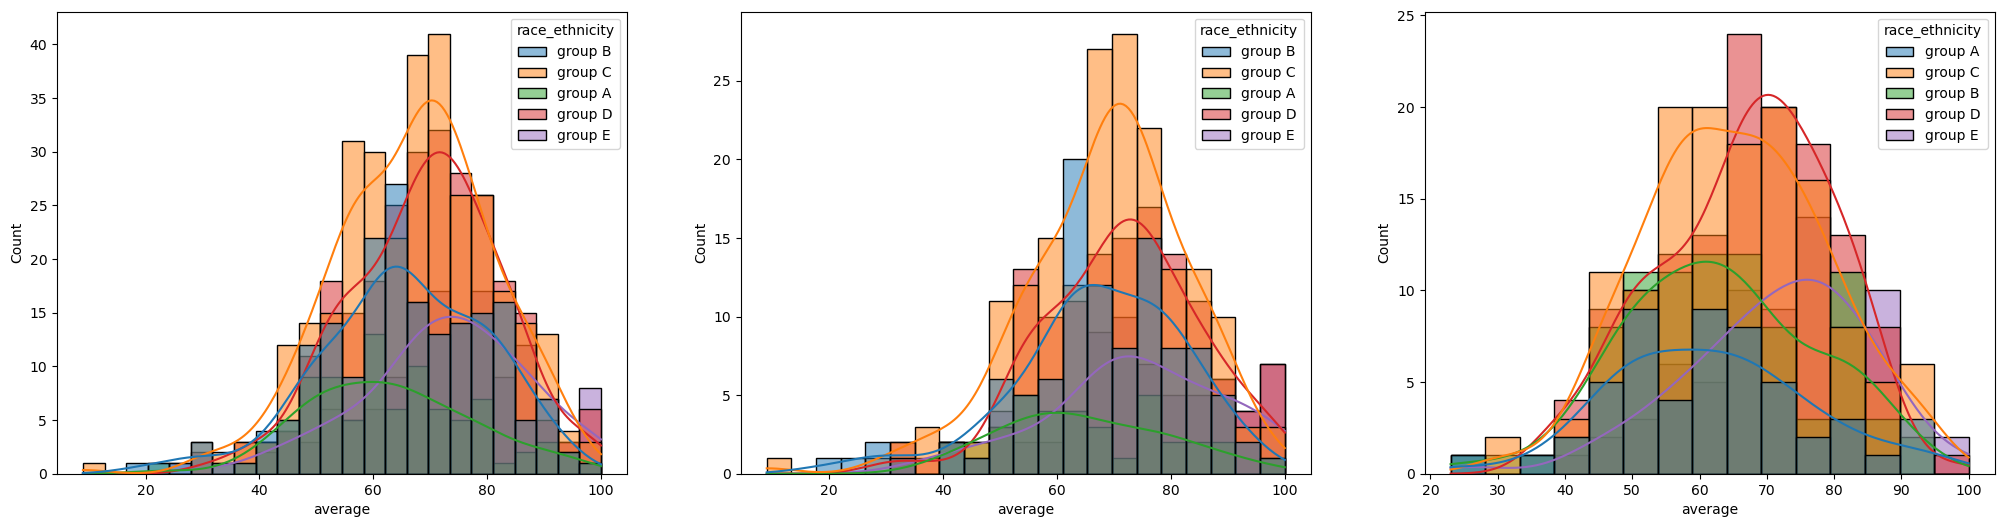

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(25,6))

plt.subplot(131)
sns.histplot(data=df, x='average', kde=True, hue='race_ethnicity')

plt.subplot(132)
sns.histplot(data=df[df.gender=='female'], x='average', kde=True, hue='race_ethnicity')

plt.subplot(133)
sns.histplot(data=df[df.gender=='male'], x='average', kde=True, hue='race_ethnicity')

plt.show()


#####  Insights
- Students of group A and group B tends to perform poorly in exam.
- Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

#### 4.2 Maximumum score of students in all three subjects

Detected columns: math_score reading_score writing_score


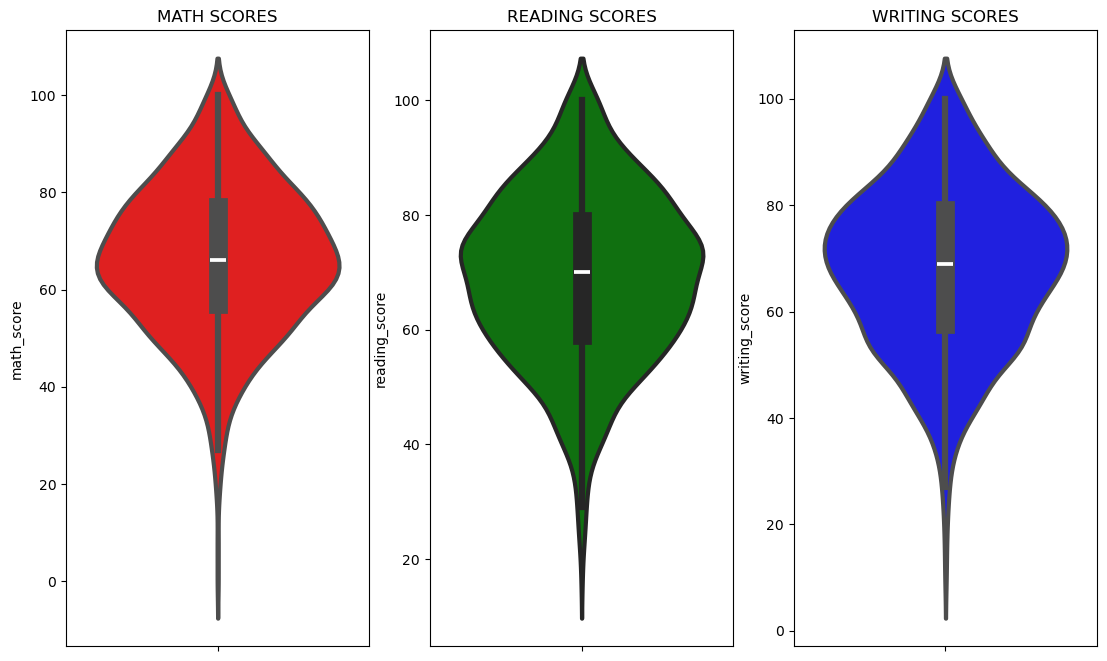

In [33]:

import matplotlib.pyplot as plt
import seaborn as sns

# -----------------------------------------
# Auto-detect correct column names
# -----------------------------------------
def find_col(target):
    for c in df.columns:
        if c.strip().lower().replace("_"," ") == target.lower():
            return c
    return None

math_col = find_col("math score")
reading_col = find_col("reading score")
writing_col = find_col("writing score")

print("Detected columns:", math_col, reading_col, writing_col)

# -----------------------------------------
# Plotting
# -----------------------------------------
plt.figure(figsize=(18,8))

plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y=math_col, data=df, color='red', linewidth=3)

plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y=reading_col, data=df, color='green', linewidth=3)

plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y=writing_col, data=df, color='blue', linewidth=3)

plt.show()


#### Insights
- From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

#### 4.3 Multivariate analysis using pieplot

gender race_ethnicity lunch test_preparation_course parental_level_of_education


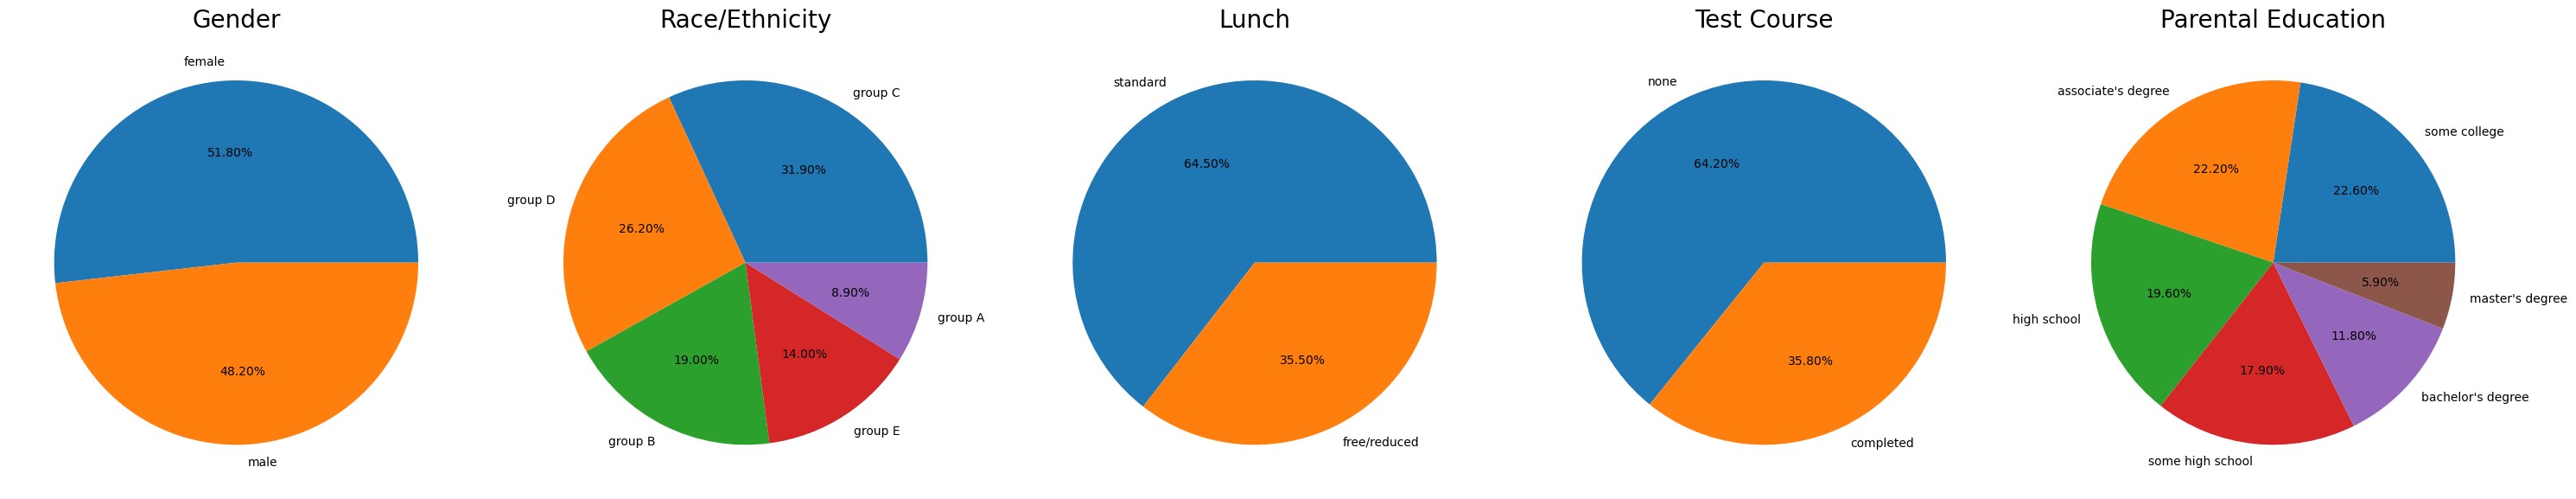

In [34]:
import matplotlib.pyplot as plt

# ----- Auto-detect the correct column names -----
def find_col(target):
    for c in df.columns:
        if c.strip().lower().replace("_"," ").replace("/", " ") == target.lower():
            return c
    return None

gender_col      = find_col("gender")
race_col        = find_col("race ethnicity")
lunch_col       = find_col("lunch")
test_col        = find_col("test preparation course")
parent_col      = find_col("parental level of education")

print(gender_col, race_col, lunch_col, test_col, parent_col)  # to verify

# ----- PLOTS -----
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df[gender_col].value_counts()
plt.pie(size, labels=size.index, autopct='%0.2f%%')
plt.title('Gender', fontsize=20)
plt.axis('off')

plt.subplot(1, 5, 2)
size = df[race_col].value_counts()
plt.pie(size, labels=size.index, autopct='%0.2f%%')
plt.title('Race/Ethnicity', fontsize=20)
plt.axis('off')

plt.subplot(1, 5, 3)
size = df[lunch_col].value_counts()
plt.pie(size, labels=size.index, autopct='%0.2f%%')
plt.title('Lunch', fontsize=20)
plt.axis('off')

plt.subplot(1, 5, 4)
size = df[test_col].value_counts()
plt.pie(size, labels=size.index, autopct='%0.2f%%')
plt.title('Test Course', fontsize=20)
plt.axis('off')

plt.subplot(1, 5, 5)
size = df[parent_col].value_counts()
plt.pie(size, labels=size.index, autopct='%0.2f%%')
plt.title('Parental Education', fontsize=20)
plt.axis('off')

plt.tight_layout()
plt.show()


#####  Insights
- Number of Male and Female students is almost equal
- Number students are greatest in Group C
- Number of students who have standard lunch are greater
- Number of students who have not enrolled in any test preparation course is greater
- Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

#### 4.4 Feature Wise Visualization
#### 4.4.1 GENDER COLUMN
- How is distribution of Gender ?
- Is gender has any impact on student's performance ?

#### UNIVARIATE ANALYSIS ( How is distribution of Gender ? )

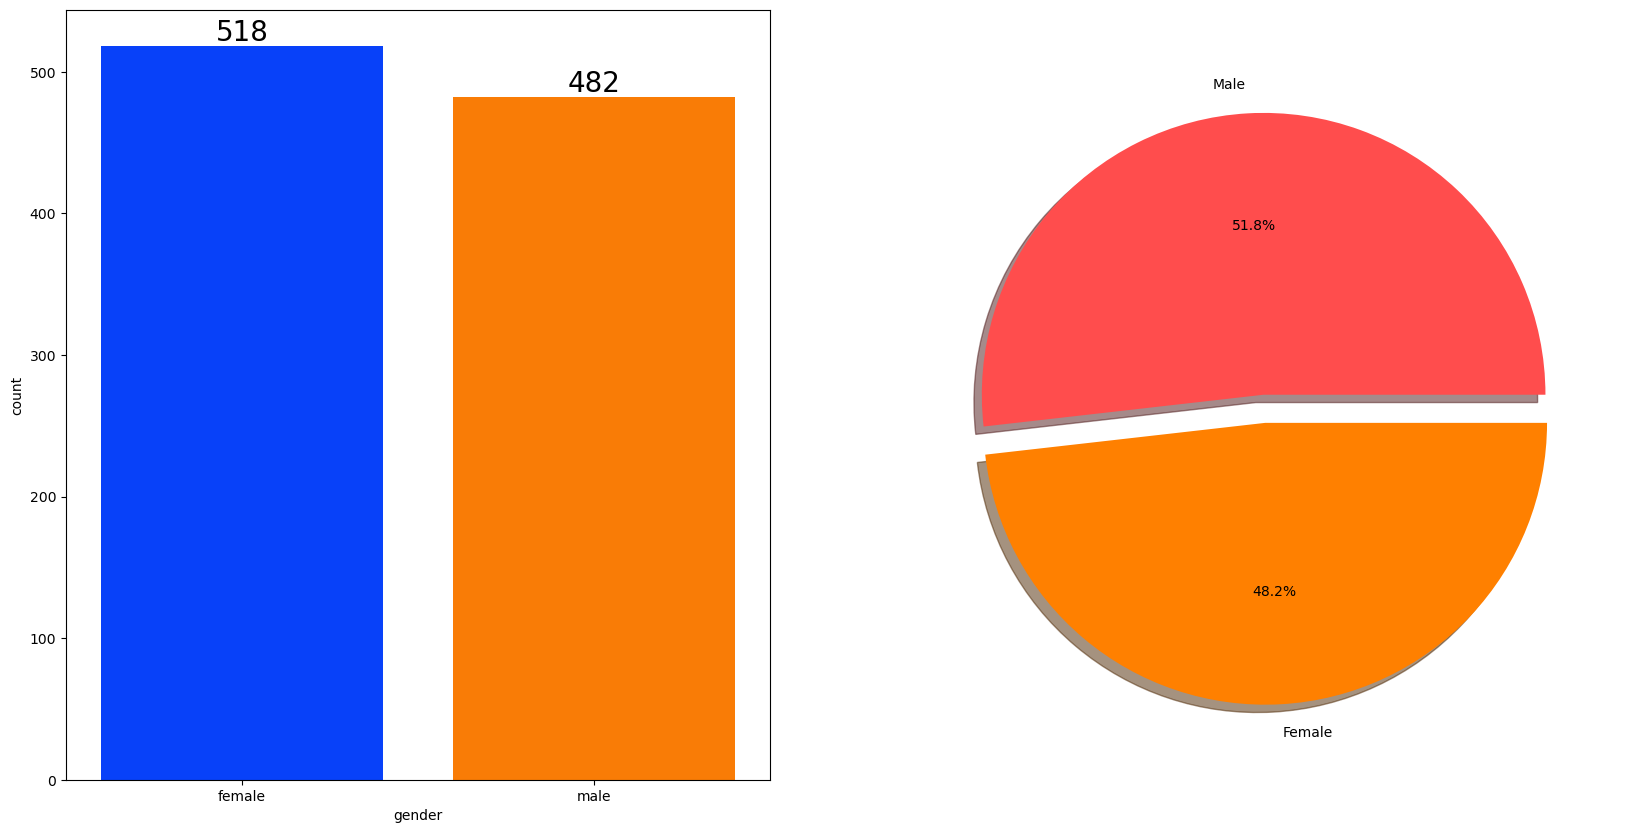

In [35]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

#### Insights 
- Gender has balanced data with female students are 518 (48%) and male students are 482 (52%) 

#### BIVARIATE ANALYSIS ( Is gender has any impact on student's performance ? ) 

In [37]:
gender_group = df.groupby('gender')[df.select_dtypes('number').columns].mean()
print(gender_group)


        math_score  reading_score  writing_score  total score    average
gender                                                                  
female   63.633205      72.608108      72.467181   208.708494  69.569498
male     68.728216      65.473029      63.311203   197.512448  65.837483


Detected columns: average math_score


<module 'matplotlib.pyplot' from 'c:\\Users\\asus\\anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

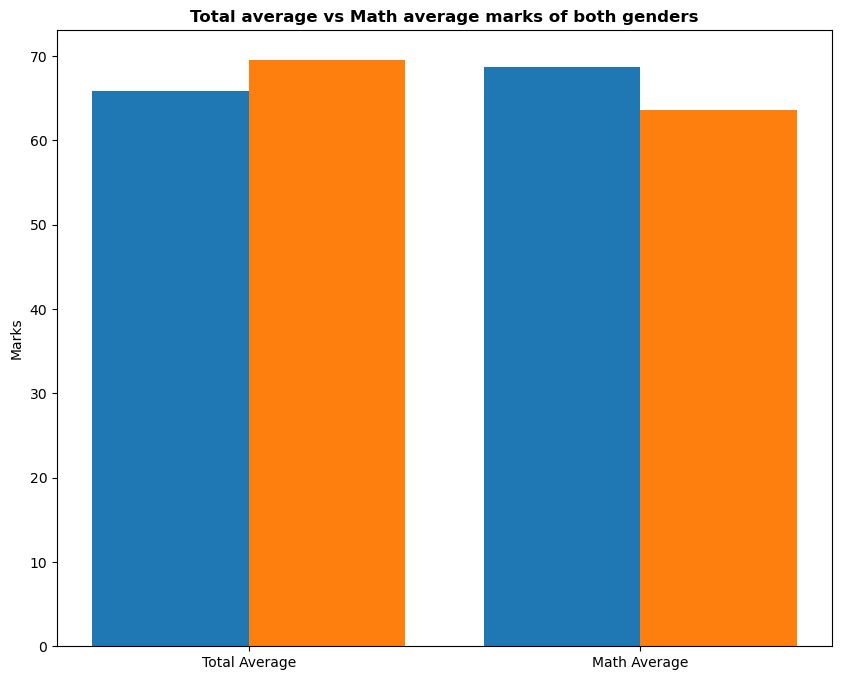

In [39]:
import numpy as np
import matplotlib.pyplot as plt

# -------- Auto-detect correct column names --------
def find_col(target):
    for c in df.columns:
        if c.strip().lower().replace("_"," ").replace("-"," ").replace("."," ") == target.lower():
            return c
    return None

avg_col  = find_col("average")
math_col = find_col("math score")

print("Detected columns:", avg_col, math_col)

# -------- Group by gender --------
gender_group = df.groupby('gender').mean(numeric_only=True)

# -------- Plotting Data --------
plt.figure(figsize=(10, 8))

X = ['Total Average', 'Math Average']

female_scores = [ gender_group.loc['female', avg_col], 
                  gender_group.loc['female', math_col] ]

male_scores = [ gender_group.loc['male', avg_col],
                gender_group.loc['male', math_col] ]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, male_scores,   0.4, label='Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label='Female')

plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average vs Math average marks of both genders", fontweight='bold')
plt



#### Insights 
- On an average females have a better overall score than men.
- whereas males have scored higher in Maths.

#### 4.4.2 RACE/EHNICITY COLUMN
- How is Group wise distribution ?
- Is Race/Ehnicity has any impact on student's performance ?

#### UNIVARIATE ANALYSIS ( How is Group wise distribution ?)

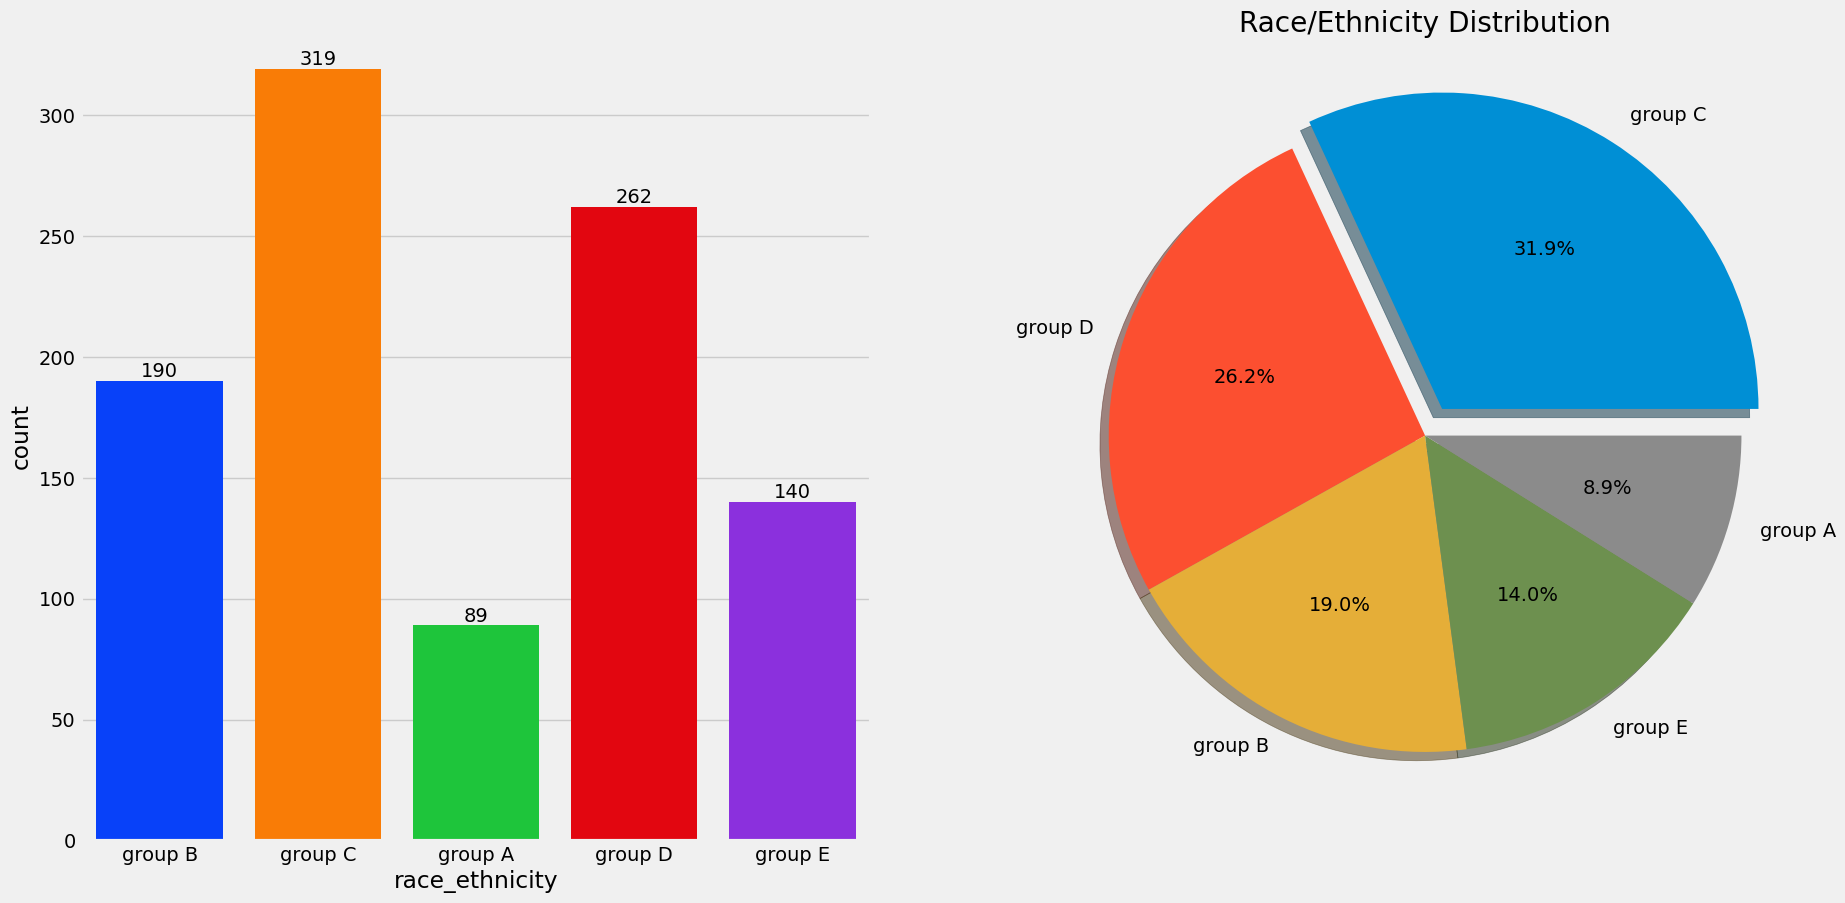

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Auto-detect column name
def find_col(target):
    for c in df.columns:
        if c.strip().lower().replace("_"," ").replace("/"," ").replace("."," ") == target.lower():
            return c
    return None

race_col = find_col("race ethnicity")

# -------- Countplot and Pie Chart --------
f, ax = plt.subplots(1, 2, figsize=(20, 10))

# Countplot
sns.countplot(x=df[race_col], data=df, palette='bright', ax=ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=14)

# Pie chart
plt.subplot(1,2,2)
plt.pie(
    x=df[race_col].value_counts(),
    labels=df[race_col].value_counts().index,
    explode=[0.1]+[0]*(len(df[race_col].value_counts())-1),
    autopct='%1.1f%%',
    shadow=True
)
plt.title("Race/Ethnicity Distribution")

plt.show()



#### Insights 
- Most of the student belonging from group C /group D.
- Lowest number of students belong to groupA.

#### BIVARIATE ANALYSIS ( Is Race/Ehnicity has any impact on student's performance ? )

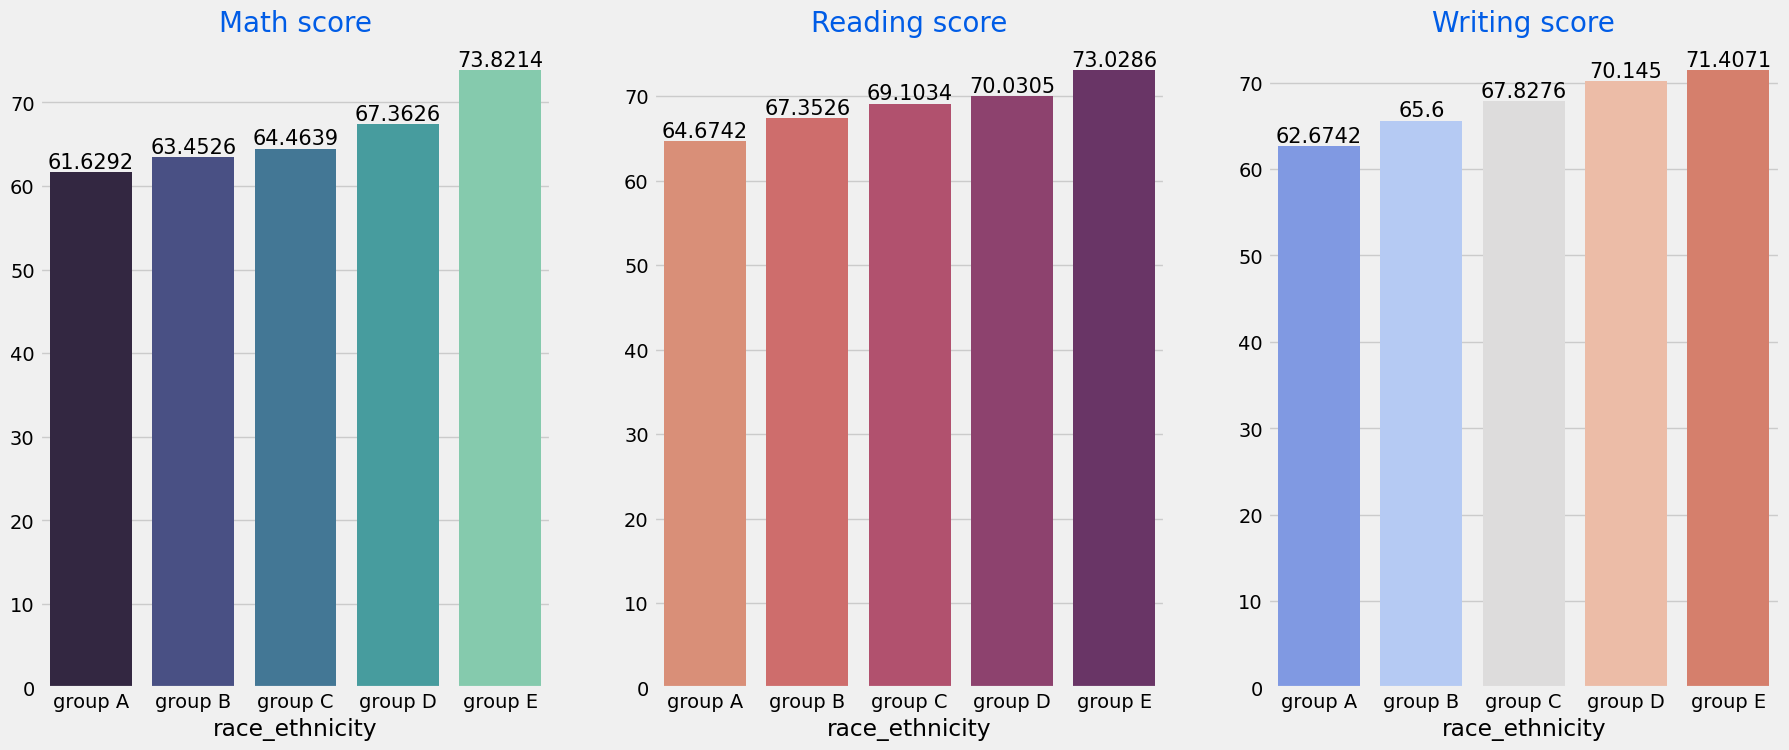

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Auto-detect numeric score columns
def find_col(target):
    for c in df.columns:
        if c.strip().lower().replace("_"," ").replace("/"," ").replace("."," ") == target.lower():
            return c
    return None

race_col    = find_col("race ethnicity")
math_col    = find_col("math score")
reading_col = find_col("reading score")
writing_col = find_col("writing score")

# Group by race
Group_data2 = df.groupby(race_col)

# Plotting
f, ax = plt.subplots(1, 3, figsize=(20, 8))

# Math score
sns.barplot(
    x=Group_data2[math_col].mean().index,
    y=Group_data2[math_col].mean().values,
    palette='mako',
    ax=ax[0]
)
ax[0].set_title('Math score', color='#005ce6', size=20)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=15)

# Reading score
sns.barplot(
    x=Group_data2[reading_col].mean().index,
    y=Group_data2[reading_col].mean().values,
    palette='flare',
    ax=ax[1]
)
ax[1].set_title('Reading score', color='#005ce6', size=20)
for container in ax[1].containers:
    ax[1].bar_label(container, color='black', size=15)

# Writing score
sns.barplot(
    x=Group_data2[writing_col].mean().index,
    y=Group_data2[writing_col].mean().values,
    palette='coolwarm',
    ax=ax[2]
)
ax[2].set_title('Writing score', color='#005ce6', size=20)
for container in ax[2].containers:
    ax[2].bar_label(container, color='black', size=15)

plt.show()


#### Insights 
- Group E students have scored the highest marks. 
- Group A students have scored the lowest marks. 
- Students from a lower Socioeconomic status have a lower avg in all course subjects

#### 4.4.3 PARENTAL LEVEL OF EDUCATION COLUMN
- What is educational background of student's parent ?
- Is parental education has any impact on student's performance ?

#### UNIVARIATE ANALYSIS ( What is educational background of student's parent ? )

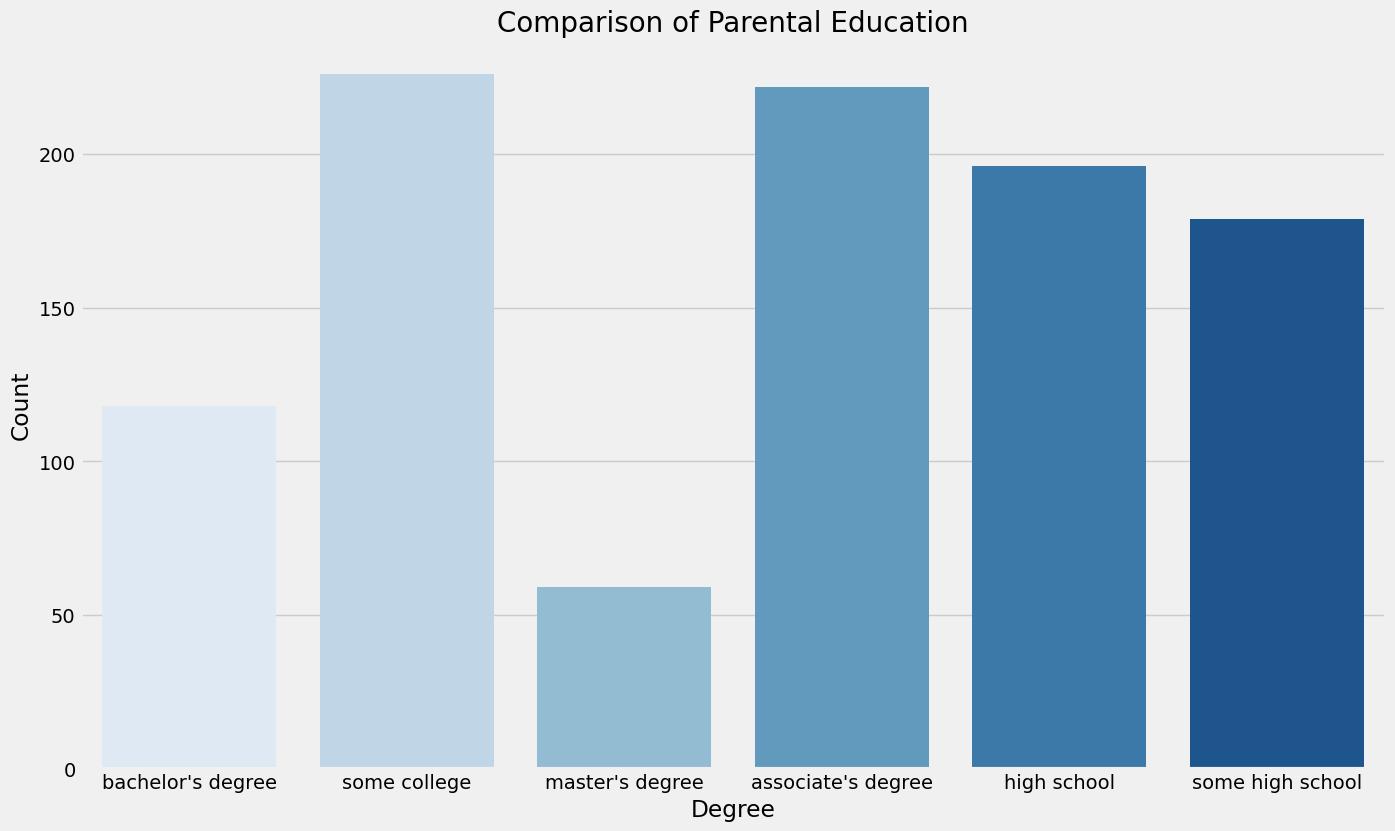

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')

sns.countplot(x=df[parent_col], palette='Blues')
plt.title('Comparison of Parental Education', fontweight=30, fontsize=20)
plt.xlabel('Degree')
plt.ylabel('Count')
plt.show()


#### Insights 
- Largest number of parents are from some college.

#### BIVARIATE ANALYSIS ( Is parental education has any impact on student's performance ? )

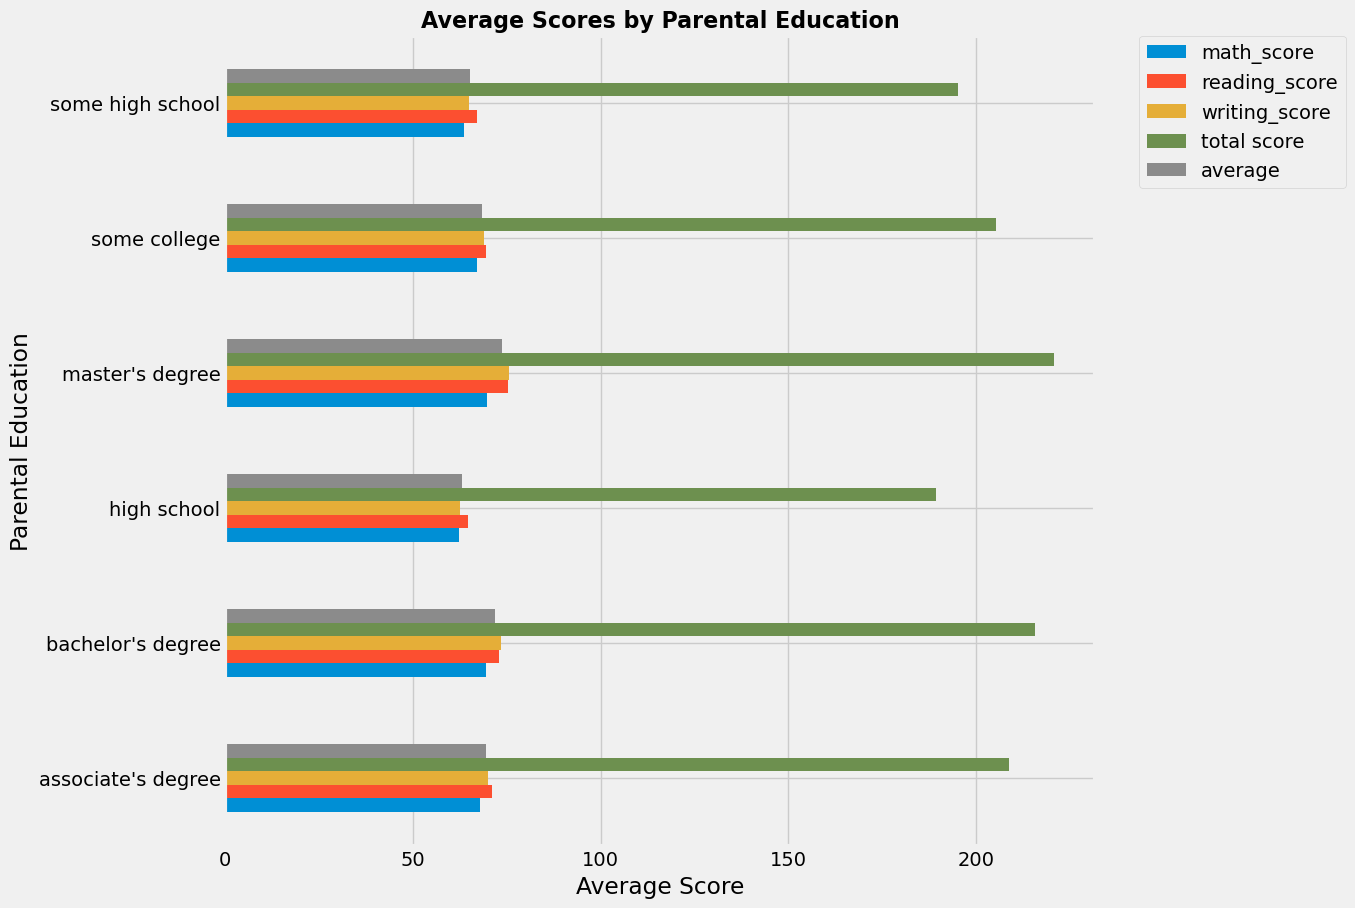

In [56]:
import matplotlib.pyplot as plt

# Group by parental education and take mean of numeric columns
df.groupby(parent_col).mean(numeric_only=True).plot(
    kind='barh',
    figsize=(10,10)
)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Average Scores by Parental Education", fontsize=16, fontweight='bold')
plt.xlabel("Average Score")
plt.ylabel("Parental Education")
plt.show()


#### Insights 
- The score of student whose parents possess master and bachelor level education are higher than others.

#### 4.4.4 LUNCH COLUMN 
- Which type of lunch is most common amoung students ?
- What is the effect of lunch type on test results?


#### UNIVARIATE ANALYSIS ( Which type of lunch is most common amoung students ? )

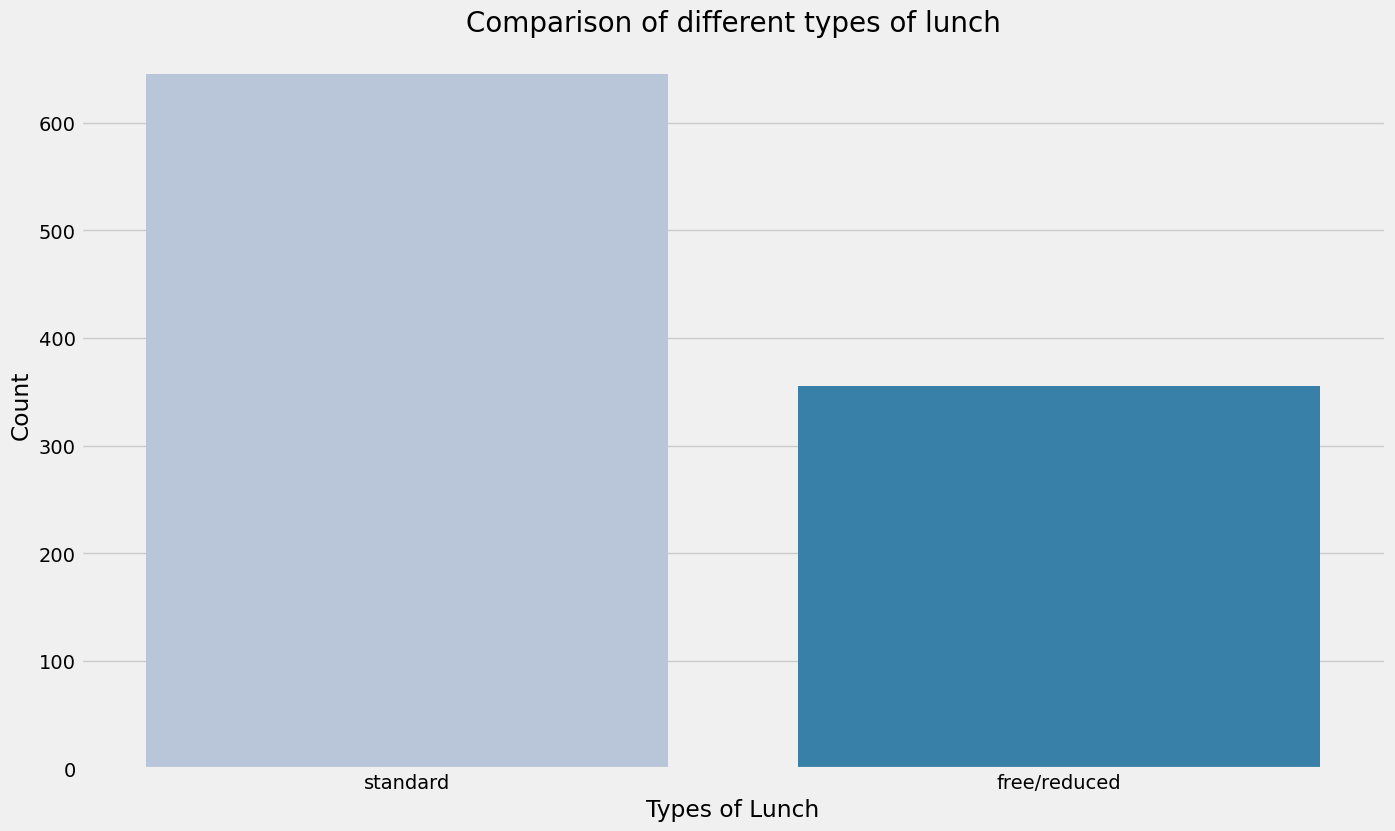

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')

sns.countplot(x=df['lunch'], palette='PuBu')
plt.title('Comparison of different types of lunch', fontweight=30, fontsize=20)
plt.xlabel('Types of Lunch')
plt.ylabel('Count')
plt.show()



#### Insights 
- Students being served Standard lunch was more than free lunch

#### BIVARIATE ANALYSIS (  Is lunch type intake has any impact on student's performance ? )

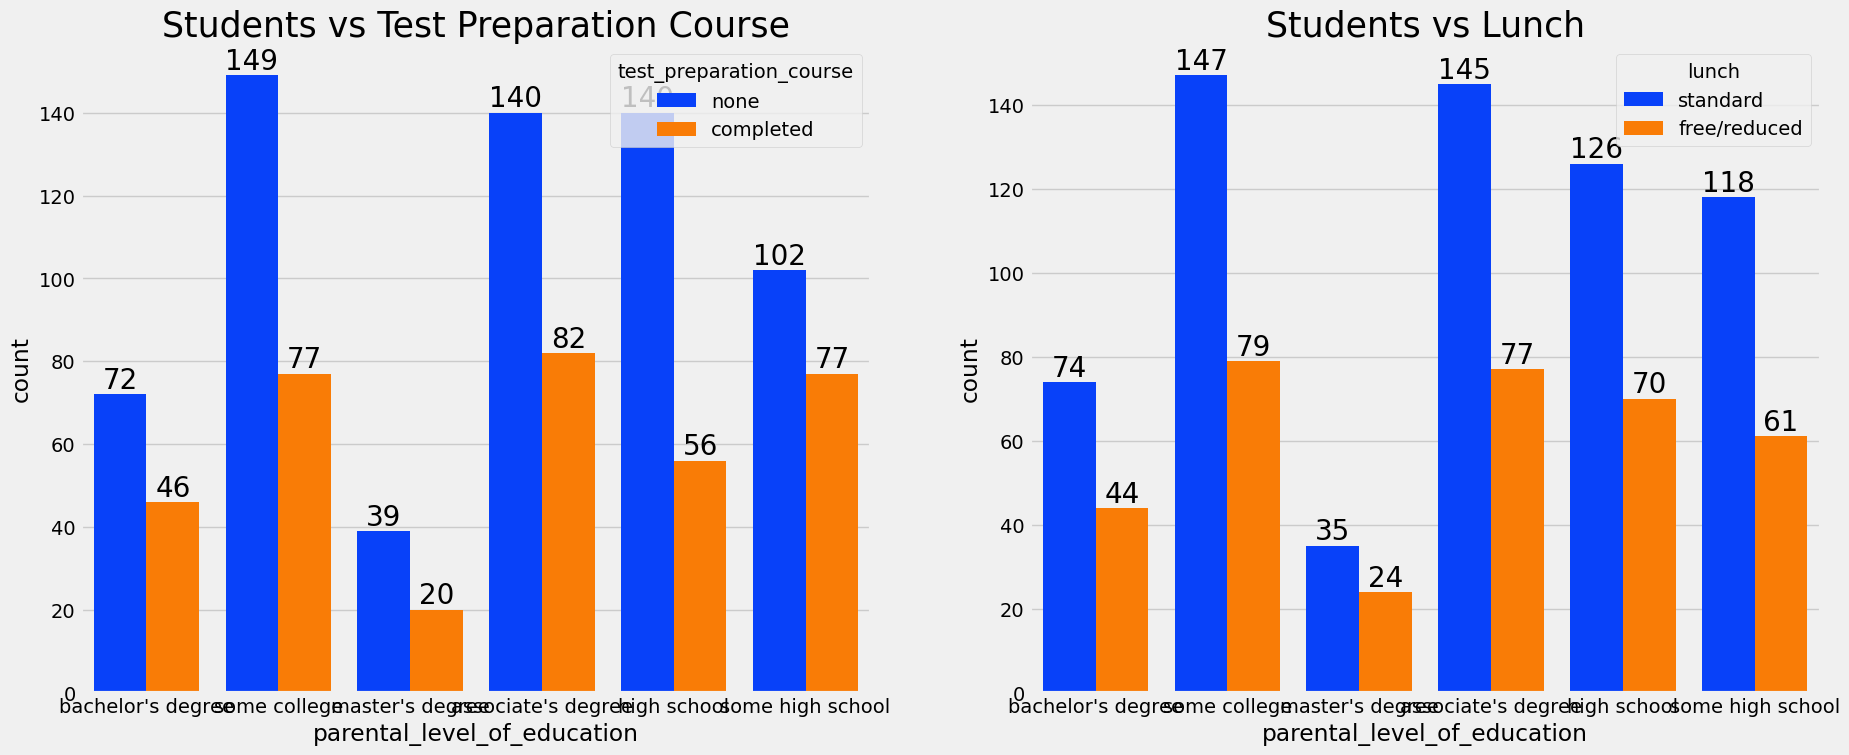

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

f, ax = plt.subplots(1, 2, figsize=(20, 8))

# Countplot 1: Test Preparation Course
sns.countplot(
    x=df[parent_col],
    data=df,
    palette='bright',
    hue=df[test_col],
    saturation=0.95,
    ax=ax[0]
)
ax[0].set_title('Students vs Test Preparation Course', color='black', size=25)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)

# Countplot 2: Lunch
sns.countplot(
    x=df[parent_col],
    data=df,
    palette='bright',
    hue=df[lunch_col],
    saturation=0.95,
    ax=ax[1]
)
ax[1].set_title('Students vs Lunch', color='black', size=25)
for container in ax[1].containers:
    ax[1].bar_label(container, color='black', size=20)

plt.show()


#### Insights 
- Students who get Standard Lunch tend to perform better than students who got free/reduced lunch

#### 4.4.5 TEST PREPARATION COURSE COLUMN 
- Which type of lunch is most common amoung students ?
- Is Test prepration course has any impact on student's performance ?

#### BIVARIATE ANALYSIS ( Is Test prepration course has any impact on student's performance ? )

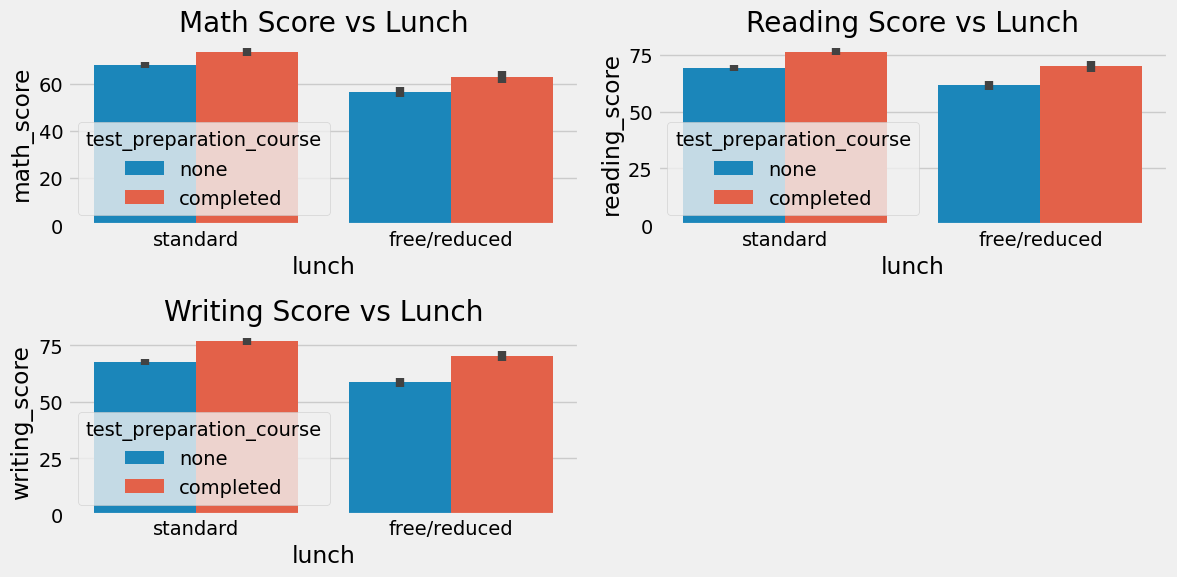

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
sns.barplot(x=df[lunch_col], y=df[math_col], hue=df[test_col])
plt.title("Math Score vs Lunch")

plt.subplot(2, 2, 2)
sns.barplot(x=df[lunch_col], y=df[reading_col], hue=df[test_col])
plt.title("Reading Score vs Lunch")

plt.subplot(2, 2, 3)
sns.barplot(x=df[lunch_col], y=df[writing_col], hue=df[test_col])
plt.title("Writing Score vs Lunch")

plt.tight_layout()
plt.show()


#### Insights  
- Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course

#### 4.4.6 CHECKING OUTLIERS

In [64]:
def find_col(target):
    for c in df.columns:
        if c.strip().lower().replace("_"," ").replace("-"," ").replace("."," ") == target.lower():
            return c
    return None

math_col    = find_col("math score")
reading_col = find_col("reading score")
writing_col = find_col("writing score")
average_col = find_col("average")
print("Detected columns:", math_col, reading_col, writing_col, average_col)


Detected columns: math_score reading_score writing_score average


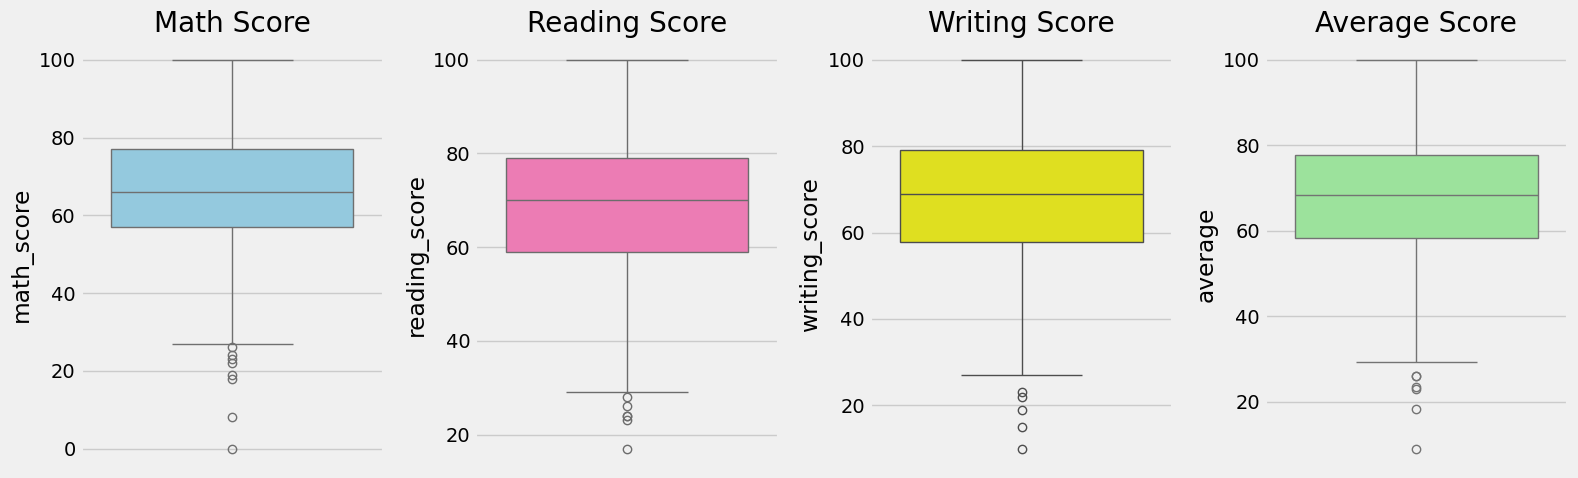

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.subplots(1, 4, figsize=(16, 5))

plt.subplot(141)
sns.boxplot(y=df[math_col], color='skyblue')
plt.title("Math Score")

plt.subplot(142)
sns.boxplot(y=df[reading_col], color='hotpink')
plt.title("Reading Score")

plt.subplot(143)
sns.boxplot(y=df[writing_col], color='yellow')
plt.title("Writing Score")

plt.subplot(144)
sns.boxplot(y=df[average_col], color='lightgreen')
plt.title("Average Score")

plt.tight_layout()
plt.show()


#### 4.4.7 MUTIVARIATE ANALYSIS USING PAIRPLOT

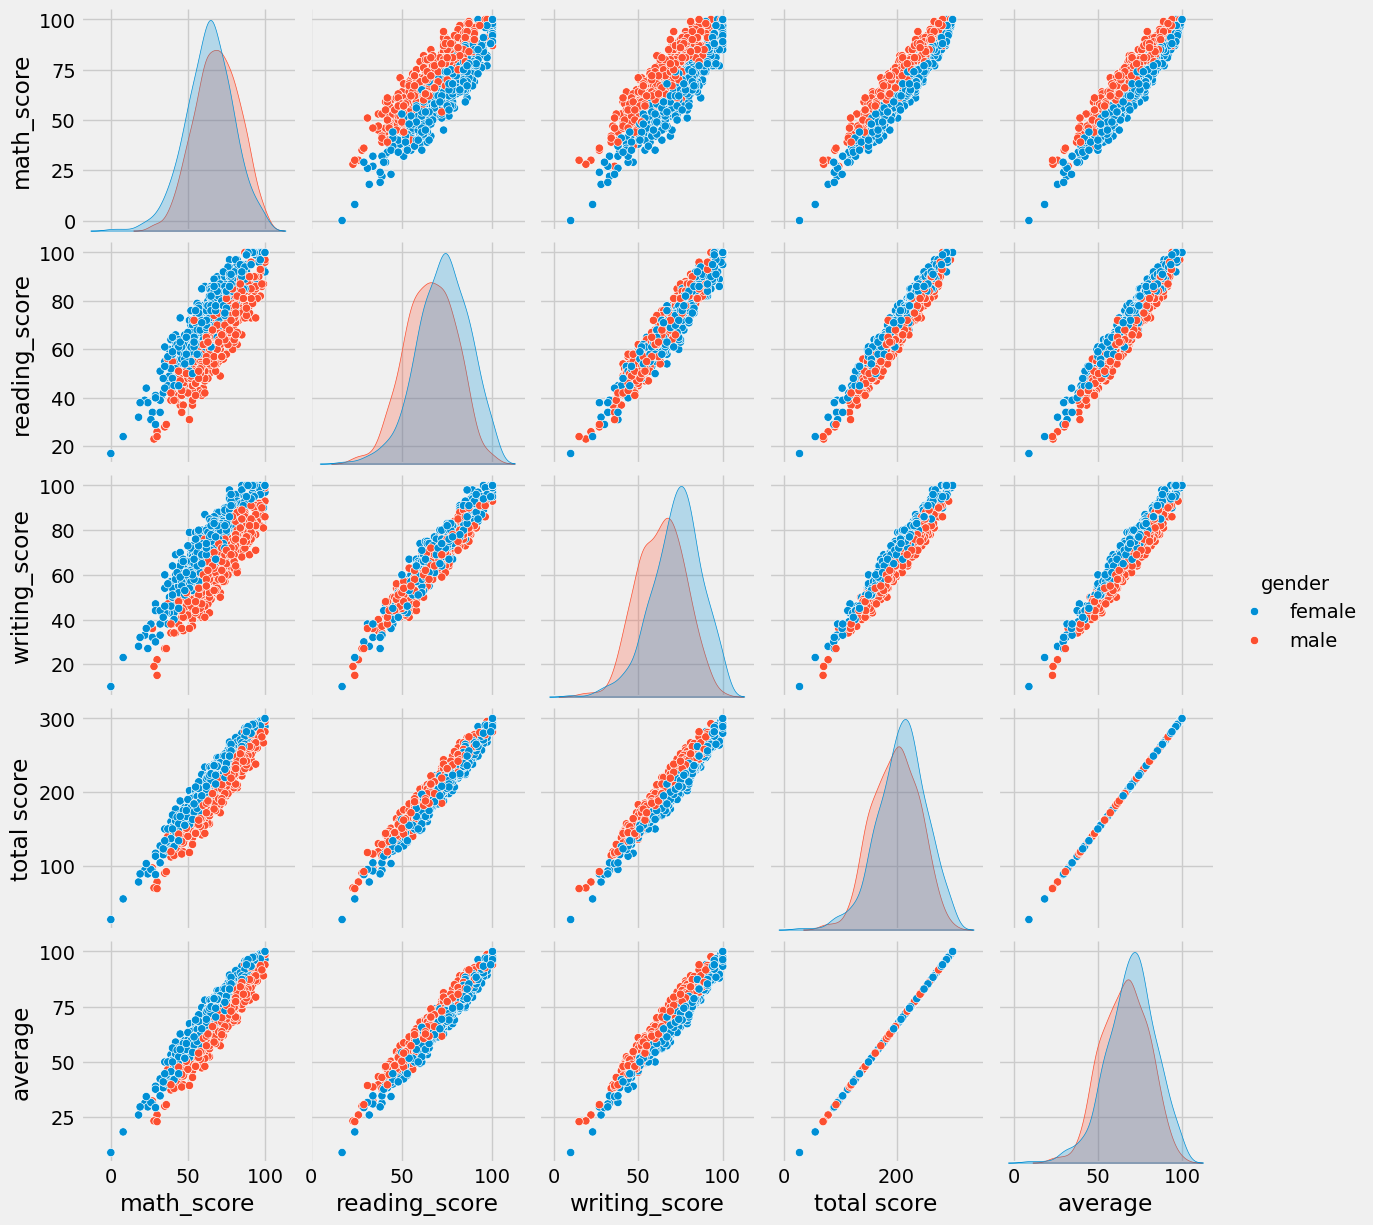

In [48]:
sns.pairplot(df,hue = 'gender')
plt.show()

#### Insights
- From the above plot it is clear that all the scores increase linearly with each other.

### 5. Conclusions
- Student's Performance is related with lunch, race, parental level education
- Females lead in pass percentage and also are top-scorers
- Student's Performance is not much related with test preparation course
- Finishing preparation course is benefitial.